Importing Dataset

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 3975 bytes


Numpy Based SOM Implementation

In [2]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8606 sha256=6477a896f7f1021b93f6ef311739cb1ee3cf6d027416b68bb0ffb0c72137ed33
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
iris = pd.read_csv('iris.csv')

In [6]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Dropping Variety Column for Working in Unsupervised learning**

In [8]:
df = iris.drop('variety', axis=1)

In [9]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cleaned = pd.DataFrame(sc.fit_transform(df))
cleaned.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**Importing Libraries for implementating SOM**

In [14]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec

In [15]:
# First two parameters are no of rows and columns
# Third parameter is about input len (colmns len)
# Fourth parameter is used for circle building 0.25 is a standard value
# Fifth parameter is just like activation function in SOM means how values are activate in clusters when it builds
s = MiniSom(7, 7, 4, sigma=0.25, neighborhood_function='gaussian')

**Training**

In [17]:
# First Convert dataframe to numpy
# second epochs
s.train_random(cleaned.to_numpy(), 30000)

In [18]:
# Simple One-Hot Encoding
target = iris.variety.astype("category").cat.codes

In [22]:
# Simple Kind Of Map of Our Trained SOM
labels_map = s.labels_map(cleaned.to_numpy(), target)

In [24]:
# Number of unique targets
label_names = np.unique(target)

In [25]:
label_names

array([0, 1, 2], dtype=int8)

In [26]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [28]:
labels_map

defaultdict(list,
            {(0, 0): Counter({1: 3}),
             (0, 2): Counter({0: 3}),
             (0, 3): Counter({0: 1}),
             (0, 4): Counter({0: 2}),
             (0, 6): Counter({2: 6}),
             (1, 0): Counter({1: 2}),
             (1, 1): Counter({1: 3}),
             (1, 2): Counter({0: 3}),
             (1, 3): Counter({0: 8}),
             (1, 4): Counter({0: 6}),
             (1, 5): Counter({0: 5}),
             (2, 0): Counter({1: 1}),
             (2, 1): Counter({1: 1}),
             (2, 2): Counter({0: 1}),
             (2, 3): Counter({0: 3}),
             (2, 4): Counter({0: 5}),
             (2, 5): Counter({0: 4}),
             (2, 6): Counter({0: 9}),
             (3, 0): Counter({2: 1}),
             (3, 1): Counter({1: 1}),
             (3, 2): Counter({1: 4}),
             (3, 3): Counter({1: 6}),
             (4, 0): Counter({1: 6}),
             (4, 1): Counter({1: 1, 2: 1}),
             (4, 2): Counter({1: 1, 2: 4}),
             (4, 3):

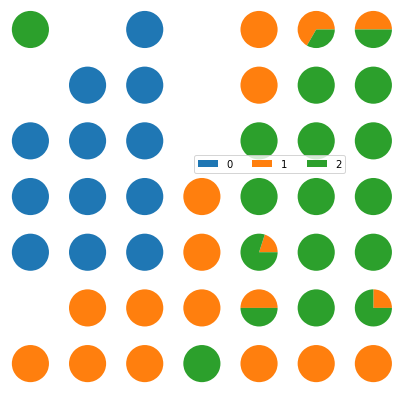

In [31]:
plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
  labels_fraces = [labels_map[position][l] for l in label_names]
  plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
  patches, texts = plt.pie(labels_fraces)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()

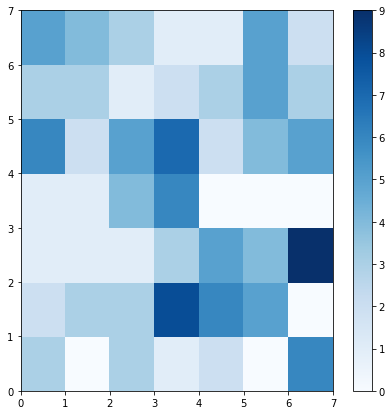

In [32]:
plt.figure(figsize=(7, 7))
frequencies = np.zeros((7, 7))

for position, values in s.win_map(cleaned.to_numpy()).items():
  frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap="Blues")
plt.colorbar()
plt.show()